# [Atividade Computacional 4](http://mtm.ufsc.br/~douglas/2025.1/MTM410024_MTM3523/Atividade4.pdf)

Em muitas funções, utilizei a macro `@views`, que faz com que as operações não
criem cópias de vetores para os cálculos, otimizando a performance, conforme a
sessão [Performance tips](https://docs.julialang.org/en/v1/manual/performance-tips/index.html#man-performance-views) do Manual do `julia`.

In [1]:
using LinearAlgebra
using Plots
using Random

# Parte 1
## Questão 1

In [2]:
y(t) = 1 + t -2*t^2 + t^3;

intervalo = 0:0.01:1;

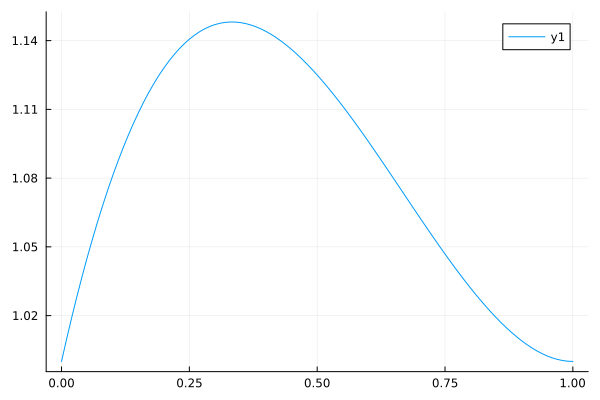

In [3]:
yt = y.(intervalo)
plot(intervalo, yt)

## Questão 2

In [4]:
ϵ = 1e-2*randn(101);
ytil = yt + ϵ;

## Questão 3

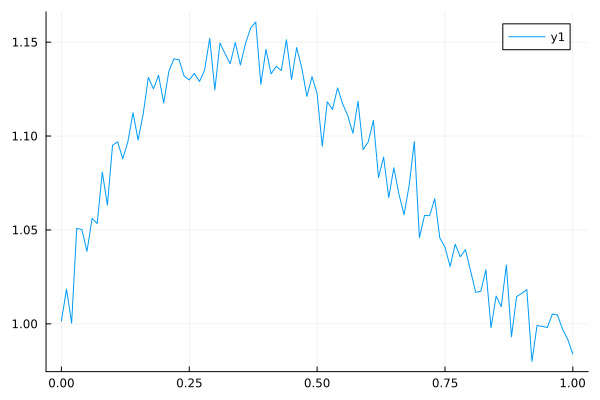

In [5]:
plot(intervalo, ytil)

## Questão 4

In [6]:
A = [ ones(101) intervalo intervalo.^2 intervalo.^3];

In [7]:
rank(A)

4

$A$ tem posto completo, e assim $A^\top A$ tem posto completo também, o que faz com que o sistema normal tenha solução única.

## Questão 5

Vamos resolver o sistema normal $$A^\top Ax = A^\top b$$

In [8]:
x = A'A\A'ytil

4-element Vector{Float64}:
  1.0050163953541942
  0.9522252072802595
 -1.89639133941032
  0.9319797087615406

Esse é o comportamento padrão do operador `\` quando aplicado a $A$ e $\tilde{y}$

In [9]:
A\ytil

4-element Vector{Float64}:
  1.0050163953541709
  0.9522252072805144
 -1.8963913394109209
  0.9319797087619243

## Questão 6

In [10]:
modelo = [1,1,-2,1]
modelo - x

4-element Vector{Float64}:
 -0.005016395354194181
  0.0477747927197405
 -0.10360866058967999
  0.06802029123845943

In [11]:
norm(modelo - x)/norm(x)

0.05261867644908365

- Analisando componente a componente, o maior erro é de 1,23%
- Analisando o vetor de parâmetros como um todo, temos um erro relativo de 0,5%.

## Questão 7

In [12]:
ychapeu(t) = x[1] + x[2]*t + x[3]*t^2 + x[4]*t^3

ychapeu (generic function with 1 method)

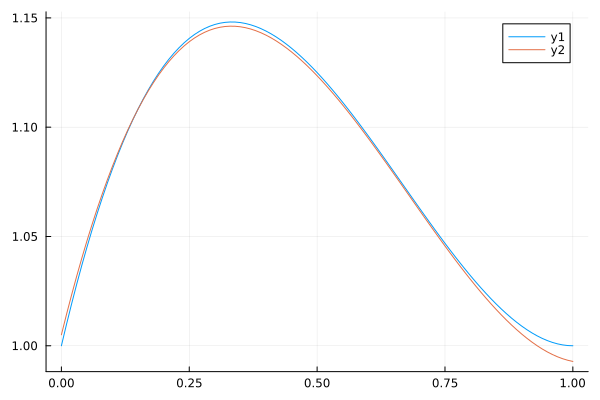

In [13]:
plot(intervalo, yt)
plot!(intervalo, ychapeu.(intervalo))

In [14]:
norm((yt - ychapeu.(intervalo)) ./ yt, Inf)

0.007170028014325758

Pensando em termos de erro relativo componente a componente, o maior erro relativo é 0,2%.

# Parte 2

In [15]:
A = [
  1 1 2 1  3 1 1 2 1 1;
  2 1 0 1 10 1 0 1 1 2;
  1 2 0 1  6 1 1 0 2 2
];

In [16]:
b  = [100, 50, 30]

3-element Vector{Int64}:
 100
  50
  30

Sendo $x = (x_1,\ldots,x_{10})$ o vetor de quantidades dos complementos, temos que resolver o sistema $$Ax = b$$

Esse sistema subdeterminado possui infinitas soluções, e dentre elas, precisamos encontrar a que minimize
$$\sum_{j=1}^{10} \frac{x_j^2}{N^2} = \frac{1}{N^2} \|x\|^2_2$$

Assim, precisamos encontrar a solução de norma-2 mínima.

Essa solução é dada pelo vetor $x$ que é ortogonal ao $N(A)$ e é determinado pela fórmula

$$x = A^\top (AA^\top)^{-1}b$$

In [17]:
x = A'*(A*A'\b)

10-element Vector{Float64}:
  4.783464566929134
  0.8464566929133763
 18.85826771653543
  5.019685039370075
  0.8858267716535408
  5.019685039370075
  5.255905511811016
 18.62204724409449
  0.8464566929133763
  0.6102362204724354